In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [11]:
#1

data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [12]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


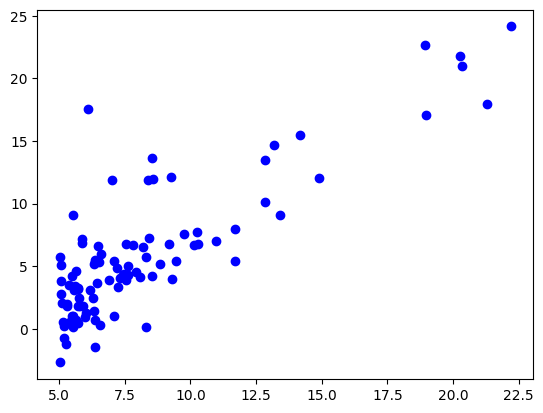

In [13]:
#2

x = data.values[:, 0]
y = data.values[:, 1]
plt.plot(x,y,'bo')

In [14]:
#3,4

X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

In [15]:
#5

def computeCost(X, y, theta):
    cost = sum(sum((theta.T@X-y)**2))/(2*len(X[0]))
    return(cost)

In [16]:
#6

print(computeCost(X,y,theta))

32.072733877455654


In [17]:
#7

def simple_gradient(X, y, theta, alpha, it):
    cost = []
    for _ in range(it):
        theta =  theta -  (X @ (alpha/X.shape[1] * ((X * theta).sum(axis=0) - y.reshape(X.shape[1], )))).reshape(theta.shape[0],1)
        cost.append(computeCost(X,y,theta))
    return theta, cost

theta2, cost2 = simple_gradient(X, y, theta, 0.01, 1000)

print(theta2)

[[-3.24140214]
 [ 1.1272942 ]]


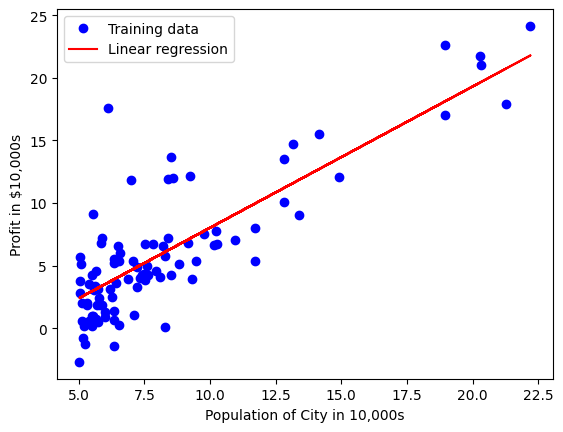

In [18]:
#8,9,10

f = theta2[1] * x + theta2[0]
x = data.values[:, 0]
y = data.values[:, 1]
plt.plot(x,y,'bo', label = "Training data")
plt.plot(x, f, color ="red", label = "Linear regression")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.legend()

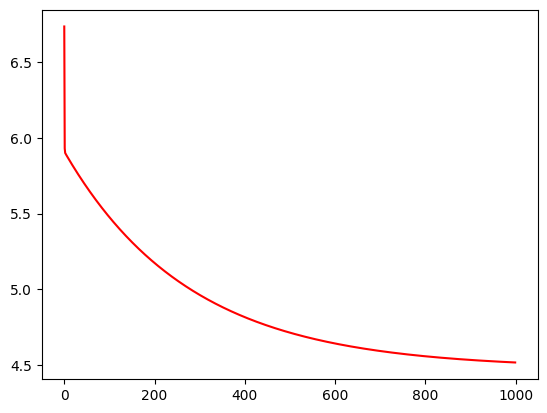

In [19]:
#11

xx = []
for i in range(len(cost2)):
    xx.append(i)
plt.plot(xx, cost2, color ="red")

In [20]:
# Multiple Variables

path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [21]:
x = data2.values[:, [0,1]]
y = data2.values[:, 2]

X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)
y.shape = [1, y.shape[0]]
theta = np.zeros((3, 1), dtype=np.float32)
x = np.append(np.ones((x.shape[0],1)), x, axis=1)
x = x.T

def normalizacja(X):
    for i in range(1, X.shape[0]):
        X[i] = (X[i] - X[i].min(axis=0)) / (X[i].max(axis=0) - X[i].min(axis=0))
    return X

X = normalizacja(x)
Y = (y[0] - y[0].min(axis=0)) / (y[0].max(axis=0) - y[0].min(axis=0))
Y = Y.reshape(1,47)
theta2, cost2 = simple_gradient(X, Y, theta, 0.01, 1000)

print(theta2)

[[0.13157093]
 [0.34097189]
 [0.16593004]]


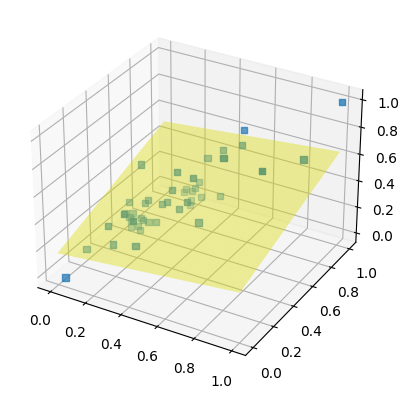

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[1], X[2], Y, marker=",")
xs = np.tile(np.linspace(min(X[1]), max(X[1]), X.shape[1]), (X.shape[1],1))
ys = (np.tile(np.linspace(min(X[2]), max(X[2]), X.shape[1]), (X.shape[1],1))).T
zs = xs*theta2[0] + ys*theta2[1] + theta2[2]
ax.plot_surface(xs, ys, zs, color = "yellow", alpha=0.4)

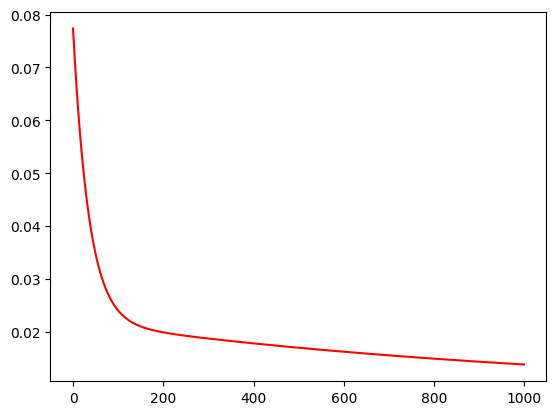

In [23]:
xx = []
for i in range(len(cost2)):
    xx.append(i)
plt.plot(xx, cost2, color ="red")

In [35]:
# Python Packages

import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
 
# Data import


# Normalization


# Split into train and test sets (70-30%)
X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y.T, test_size=0.5, random_state=50)

# Creating an object 
regr = linear_model.LinearRegression()
 
# Learning model on training data
regr.fit(X_train, Y_train)
# Predicting values using test data
Y_predicted = regr.predict(X_test)
 
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)

print("Intercept:", regr.intercept_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [[ 0.          1.07567852 -0.15748879]]
Intercept: [0.07505014]
Residual sum of squares: 0.01466515255024394
